This code is a rice grain classification which was created as a requirement to enroll in the subject Business Challenge, an elective course to physicals of last semesters in University of Andes, Bogota-Colombia.

In [2]:
import tensorflow as tf
import os
import zipfile
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from PIL import Image
import cv2
import zipfile
import pandas as pd
import io


In [3]:
 !git clone https://github.com/NetworkAI-UniAndes/classification-exam-fisi-3650.git

Cloning into 'classification-exam-fisi-3650'...
remote: Enumerating objects: 59724, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 59724 (delta 0), reused 3 (delta 0), pack-reused 59720
Receiving objects: 100% (59724/59724), 162.83 MiB | 31.65 MiB/s, done.
Resolving deltas: 100% (5/5), done.
Checking out files: 100% (60012/60012), done.


Here we load test images,  reduce their size to (80,80)px and save them in an array.



(10000, 80, 80, 3)

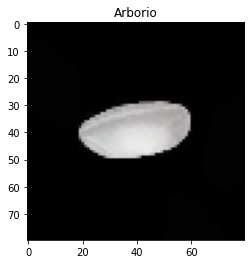

In [4]:
#function to get a data frame of test images (This function was provided by the evaluator)
def load_test_paths(base_path):
    label_dict={'Arborio':0,'basmati':1,'Ipsala':2,'Jasmine':3,'Karacadag':4}
    filenames = os.walk(base_path)
    files=list(filenames)[0][2]
    files=[file for file in files if file.endswith(".jpg")]
    labels=[label_dict[file.split(' ')[0]] for file in files]
    file_df=pd.DataFrame({"file":files,"label":labels})
    file_df["file"]=file_df.file.map(lambda x: os.path.join(base_path,x))
    return file_df
df_test=load_test_paths("/content/classification-exam-fisi-3650/Rice_Image_Dataset/Test")
imagenes=df_test["file"]
labels=df_test["label"]
class_names = ['Arborio','basmati','Ipsala','Jasmine','Karacadag']
images_test=[]
labels_test=np.zeros(len(imagenes)).astype("uint8")
iter=0
#This for reduce the shape of the image and add it into array
for x,y in zip(imagenes,labels):
  images_test.append(np.array(cv2.resize(cv2.imread(x),(80,80)).astype("uint8")))
  labels_test[iter]=y
  iter=iter+1
images_test=np.array(images_test)
plt.imshow(images_test[4])
plt.title(class_names[int(labels_test[4])])
np.shape(images_test)

Here we load test images,  reduce their size to (80,80)px and save them in an array.

(50000, 80, 80, 3)

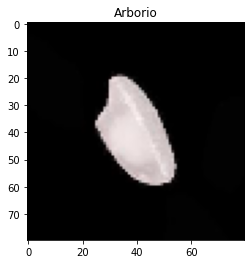

In [5]:
df_train1=load_test_paths("/content/classification-exam-fisi-3650/Rice_Image_Dataset/Train/Arborio")
df_train2=load_test_paths("/content/classification-exam-fisi-3650/Rice_Image_Dataset/Train/Basmati")
df_train3=load_test_paths("/content/classification-exam-fisi-3650/Rice_Image_Dataset/Train/Ipsala")
df_train4=load_test_paths("/content/classification-exam-fisi-3650/Rice_Image_Dataset/Train/Jasmine")
df_train5=load_test_paths("/content/classification-exam-fisi-3650/Rice_Image_Dataset/Train/Karacadag")
images_train=[]
labels_train=[]

for df in [df_train1,df_train2,df_train3,df_train4,df_train5]:
  imagenes=df["file"]
  labels=df["label"]
  #This for reduce the shape of the image and add it into array
  for x,y in zip(imagenes,labels):
    images_train.append(np.array(cv2.resize(cv2.imread(x),(80,80))).astype("uint8"))
    labels_train.append(y)
images_train=np.array(images_train)
labels_train=np.array(labels_train)
plt.imshow(images_train[4])
plt.title(class_names[int(labels_train[4])])
np.shape(images_train)

We transform data from float array to int array

In [7]:
labels_train=labels_train.astype(int)
labels_test=labels_test.astype(int)
print(labels_test, labels_train)

[0 0 1 ... 1 3 1] [0 0 0 ... 4 4 4]


Here we define the architecture of the CNN, the number of epochs and train the model.

In [8]:
from tensorflow.keras.callbacks import TensorBoard
Model1=tf.keras.models.Sequential([
                                   
    tf.keras.layers.Conv2D(32,(3,3), activation="relu", input_shape=(80,80,3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(5, activation="softmax")

])
Model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
tensorboardDenso = TensorBoard(log_dir='logs/denso')

Model1.fit(images_train, labels_train, epochs=5)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 22s 9ms/step - loss: 0.4088 - accuracy: 0.9542
Epoch 2/5
1563/1563 [==============================] - 13s 9ms/step - loss: 0.0697 - accuracy: 0.9763
Epoch 3/5
1563/1563 [==============================] - 13s 8ms/step - loss: 0.0542 - accuracy: 0.9817
Epoch 4/5
1563/1563 [==============================] - 13s 8ms/step - loss: 0.0456 - accuracy: 0.9854
Epoch 5/5
1563/1563 [==============================] - 13s 8ms/step - loss: 0.0373 - accuracy: 0.9884


We evaluate the model who have an accuracy of 96.81%

In [9]:
Model1.evaluate(
    x=images_test,
    y=labels_test,
    batch_size=32,
    verbose='auto',
    sample_weight=None,
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
    return_dict=False,
)

313/313 [==============================] - 2s 5ms/step - loss: 0.3220 - accuracy: 0.9681


[0.32200008630752563, 0.9681000113487244]